## Airline Passenger Referral Prediction

The project aims to predict whether a passenger referred by an existing customer will book a flight or not, based on various features such as seat comfort, cabin service, travel class,food beverage , entertainment service, etc.The main objective is to predict whether passengers will refer the airline to their friends or not.

### Import Packages

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score

In [3]:
data_df = pd.read_excel(r"data_airline_reviews.xlsx")

In [4]:
data_df.sample(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
41423,AirAsia,10.0,Colin Himmelberger,17th April 2013,I have taken 2 trips to Phuket in the last 6 m...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,4.0,4.0,NaN,5.0,yes
34576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97135,Air India,9.0,Silver Mani,30th November 2015,"These Air India flights were both on time, and...",Boeing 787,Solo Leisure,Economy Class,London to Delhi,November 2015,5.0,5.0,5.0,3.0,5.0,5.0,yes


- Data Rows and Columns

In [5]:
print("Number of Rows",data_df.shape[0])
print("Number of columns",data_df.shape[1])

Number of Rows 131895
Number of columns 17


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

- Check Duplicate values

In [7]:
data_df.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

- Droping duplicate values

In [8]:
data_df.drop_duplicates(inplace=True)

In [9]:
data_df.duplicated().value_counts()

False    61184
Name: count, dtype: int64

- Null Values / Missing values

In [10]:
null_df = data_df.isnull().sum().sort_values(ascending = False)
percent_null = round((data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending = False)*100,3)

merge_col = pd.concat([null_df,percent_null],axis=1,keys=['Count','Missing %'])
merge_col

,Count,Missing %
aircraft,42696,69.783
ground_service,24015,39.250
date_flown,23750,38.817
route,23671,38.688
traveller_type,23644,38.644
entertainment,20954,34.248
food_bev,12843,20.991
seat_comfort,4973,8.128
cabin_service,4944,8.081
cabin,2479,4.052


- There are 131895 Rows and 17 columns.
- There are  70711 duplicated values.
- All the features have null values.

- Understanding variables

In [11]:
data_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


*    Most of the passenger give overall rating around 4.5.
*   Most of the people give seat comfort service rating around 3.
*   Most of the people give cabin_service rating around 3.1 
*   Most of the people give food_bev service rating around 3
*   Most of the people give entertainment service rating around 2.
*   Most of the people give ground service rating around 3
*   Most of the people give value_for_money rating around 3

unique values for each feature

In [12]:
for i in data_df.columns.to_list():
    print(f'Number of unique values for in {i}, is {data_df[i].nunique()}.')

Number of unique values for in airline, is 81.
Number of unique values for in overall, is 10.
Number of unique values for in author, is 44069.
Number of unique values for in review_date, is 3015.
Number of unique values for in customer_review, is 61172.
Number of unique values for in aircraft, is 2088.
Number of unique values for in traveller_type, is 4.
Number of unique values for in cabin, is 4.
Number of unique values for in route, is 24549.
Number of unique values for in date_flown, is 63.
Number of unique values for in seat_comfort, is 5.
Number of unique values for in cabin_service, is 5.
Number of unique values for in food_bev, is 5.
Number of unique values for in entertainment, is 5.
Number of unique values for in ground_service, is 5.
Number of unique values for in value_for_money, is 5.
Number of unique values for in recommended, is 2.


### EDA

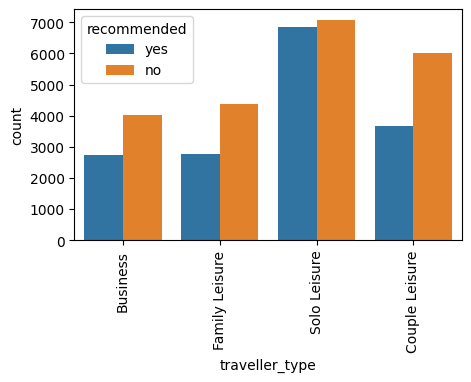

In [13]:

#set the fig size and plotting the graph
data_df.dropna(subset=['traveller_type'],inplace=True)
plt.figure(figsize=(5,3))
sns.countplot(x=data_df['traveller_type'],data=data_df,hue=data_df['recommended'])
plt.xticks(rotation=90)
plt.show()


- Solo Leisure travels more followed by Couple Leisure and family.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


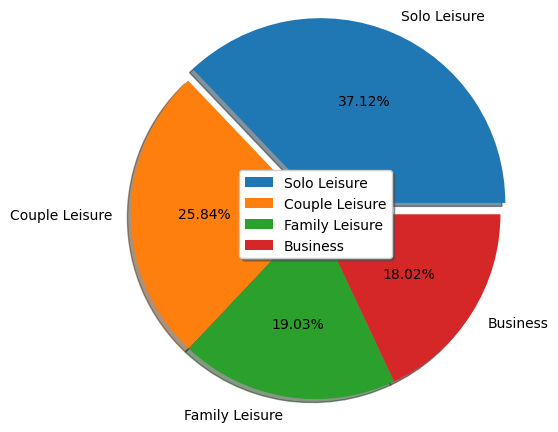

In [14]:

label_for_traveller = ['Solo Leisure','Couple Leisure','Family Leisure','Business']
data1 = data_df['traveller_type'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data1, labels = label_for_traveller,explode=explode,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 10})
plt.legend(loc='center',shadow=True,fancybox=True)
plt.show()

we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo.Followed by couple and family.

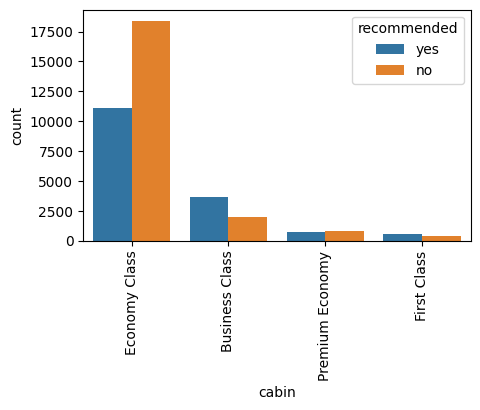

In [15]:
#set the fig size and plotting the graph
data_df.dropna(subset=['cabin'],inplace=True)
plt.figure(figsize=(5,3))
sns.countplot(x=data_df['cabin'],data=data_df,hue=data_df['recommended'])
plt.xticks(rotation=90)
plt.show()

- Economy class has the highest counts with bad ratings.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


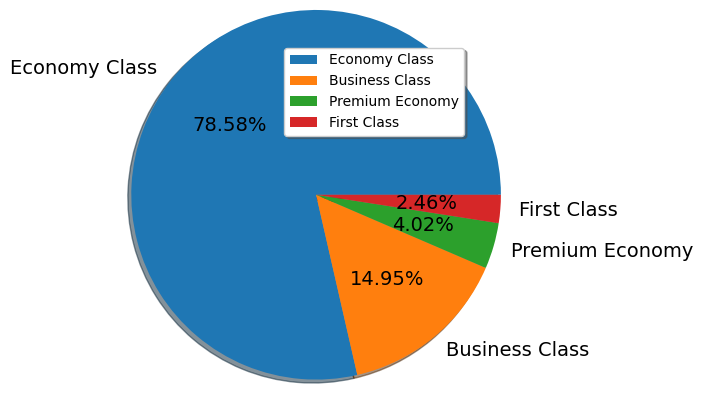

In [16]:
label_for_cabin = ['Economy Class','Business Class','Premium Economy','First Class']
data2 = data_df['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_cabin,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

- We can conclude that most of the people around 78.44% people choose economy class to travel by airline.Followed by Business class and others

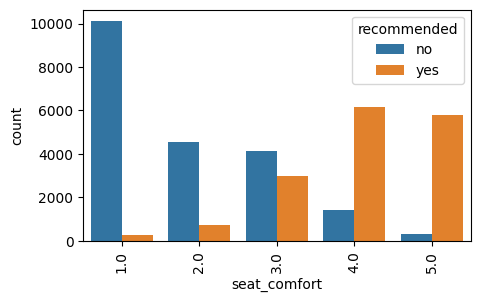

In [17]:
#set the fig size and plotting the graph
data_df.dropna(subset=['seat_comfort'],inplace=True)
plt.figure(figsize=(5,3))
sns.countplot(x=data_df['seat_comfort'],data=data_df,hue=data_df['recommended'])
plt.xticks(rotation=90)
plt.show()

- In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same.

- Also we can see seat class 1 have been given highest negative recommendation as compare to it's positive recommendation.Here we come to a conclusion it must be removed as early as possible.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


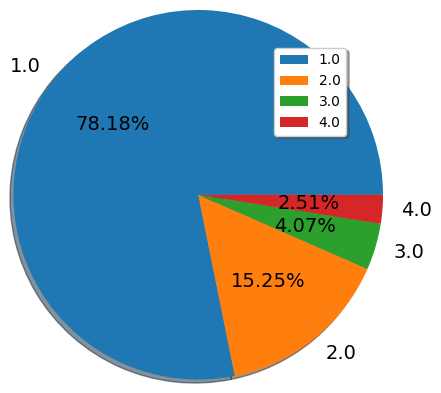

In [18]:
label_for_seat_comfort = ['1.0','2.0','3.0','4.0']
data2 = data_df['cabin'].value_counts().values
plt.figure(figsize=(4,4))
plt.axis("equal")
plt.pie(data2, labels = label_for_seat_comfort,radius=1.5,autopct='%0.2f%%',shadow=True,textprops={'fontsize': 14})
plt.legend(loc='upper right',shadow=True,fancybox=True)
plt.show()

- 25% people are not satisfied with seat comfort.As they give 1.0 rating.

-	42% people are giving 4.0 and 5.0 rating for seat comfort.So overall rating is good.So we can say that good value for seat comfort service positively impact airline business.

### Data Cleaning

- Drop NA values in aircraft,because aircraft feature has highest null values

In [19]:
data_df = data_df.drop(['aircraft'],axis=1)

In [20]:
#drop unnecessary columns,which are not for our use
data_df = data_df.drop(['author','review_date', 'route', 'date_flown', 'customer_review'],axis=1)

Reason for droping columns:

Author - Being the categorical with high Variability not required for prediction.

Route - Not needed for building a model as it is independent of the Services and Quality of travel.

Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.

Review_date - Similar to Date_flown

Customer_review - As it is related to overall review feature of the datasets.

In [21]:
# splitting the numeric column based on null values
low_null_val = ['overall','seat_comfort','cabin_service','value_for_money']
high_null_val = ['food_bev','entertainment','ground_service']

In [22]:
#imputation technique using Q1 value(for low null values)
def imput_by_q1(df,col):
  q1 = np.percentile(np.sort(df[col].dropna()),25)
  df[col].fillna(q1,inplace=True)

In [23]:

#looping the NA/NULL values
for col in low_null_val:
  imput_by_q1(data_df,col)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\4130503935.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(q1,inplace=True)


In [24]:
#imputation technique using median technique(for high null values)
def imput_by_med(df,col):
  df[col].fillna(df[col].median(),inplace=True)

In [25]:
#looping the NA/NULL values
for col in high_null_val:
  imput_by_med(data_df,col)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\2683117949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\2683117949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [26]:
#remove null value from recommended column
data_df.dropna(subset=['recommended'],inplace=True)

In [27]:
#handle na values in traveller_type column
data_df['traveller_type'].fillna(method='ffill',inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\3712316442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['traveller_type'].fillna(method='ffill',inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\3712316442.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['traveller_type'].fillna(method='ffill',inplace=True)


In [28]:
#handle na values in cabin column
data_df['cabin'].fillna(data_df['cabin'].mode().values[0],inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\1599505224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['cabin'].fillna(data_df['cabin'].mode().values[0],inplace=True)


In [29]:
null_df = data_df.isnull().sum().sort_values(ascending = False)
percent_null = round((data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending = False)*100,3)

merge_col = pd.concat([null_df,percent_null],axis=1,keys=['Count','Missing %'])
merge_col

,Count,Missing %
airline,0,0.0
overall,0,0.0
traveller_type,0,0.0
cabin,0,0.0
seat_comfort,0,0.0
cabin_service,0,0.0
food_bev,0,0.0
entertainment,0,0.0
ground_service,0,0.0
value_for_money,0,0.0


## Feature Engineering

In [30]:
data_df = data_df.drop(['airline'],axis=1)

In [31]:

data_df.drop(['overall'],axis=1,inplace=True)
data_df = data_df.drop(['traveller_type'],axis=1)

data_df = data_df.drop(['cabin'],axis=1)

- Label Encoding

In [32]:
#converting target column
data_df['recommended'].replace({'yes':1,'no':0},inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\850523969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['recommended'].replace({'yes':1,'no':0},inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_145044\850523969.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['r

- Correlation Matrix

<Axes: >

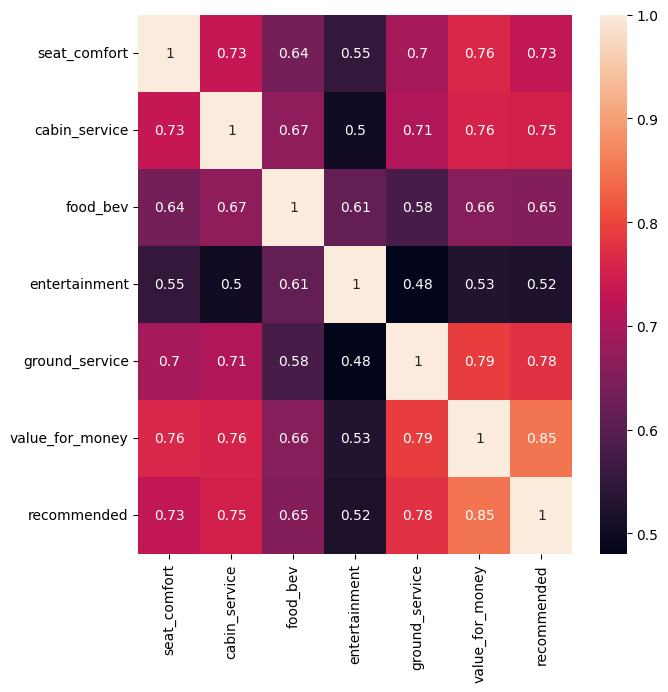

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(data_df.corr(),annot=True)

- Defining Independent And Dependent Features

In [34]:
#seperate independent and dependentfeatures
y = data_df['recommended']
x = data_df.drop(columns='recommended')

- One Hot Encoding

In [35]:
#encoding
x = pd.get_dummies(x)
x

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
1,4.0,5.0,4.0,4.0,2.0,4.0
3,4.0,1.0,1.0,1.0,1.0,1.0
5,1.0,4.0,1.0,3.0,1.0,2.0
7,4.0,5.0,5.0,5.0,5.0,5.0
9,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
131706,1.0,2.0,1.0,3.0,2.0,2.0
131708,3.0,1.0,3.0,3.0,1.0,3.0
131710,2.0,2.0,3.0,3.0,4.0,1.0
131712,1.0,1.0,1.0,3.0,1.0,5.0


The Percentage of No labels of Target Variable is 56.0
The Percentage of Yes labels of Target Variable is 44.0


<Axes: xlabel='recommended', ylabel='count'>

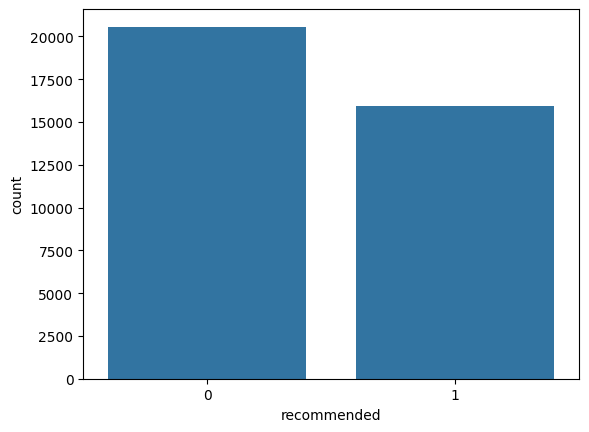

In [36]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(x=data_df['recommended'],data=data_df)

#### **Data Preprocessing**

In [37]:
#splitting train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [38]:
#shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(27395, 6)
(9132, 6)


In [39]:
#shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(27395,)
(9132,)


### **Model Building**

- Logistic Regression

In [40]:
#logistic regreesion fitting
log_class = LogisticRegression(max_iter=10000)
log_class.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [41]:
#predicting the result
y_pred_logclass = log_class.predict(x_test)

In [42]:
#training and testing score 
print(log_class.score(x_train,y_train))
print(log_class.score(x_test,y_test))

0.9443329074648659
0.9446999561979851


In [44]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred_logclass)
print(report_lR)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5147
           1       0.93      0.94      0.94      3985

    accuracy                           0.94      9132
   macro avg       0.94      0.94      0.94      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

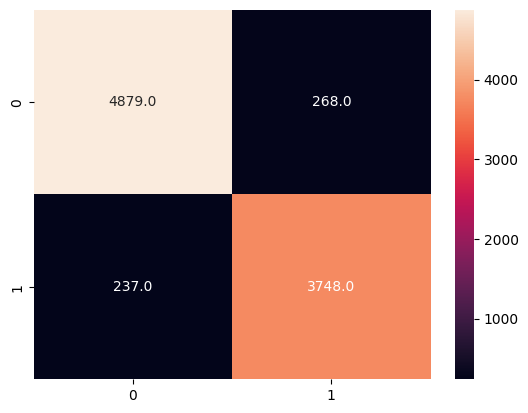

In [45]:
#confusion matrix of logistic regression
confuse_mat_lr = confusion_matrix(y_test,y_pred_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr, annot=True, fmt = ".1f")

- Logistic Regression With Cross Validation

In [46]:
#cross validation
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2','elasticnet','none']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [47]:
#hyper parameter tuning
clf_logclass = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [100]:
#fit training data
clf_logclass.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [49]:
#predicting the result
y_pred_hyper_logclass = clf_logclass.predict(x_test)

In [50]:
#training and testing data score
print(clf_logclass.score(x_train,y_train))
print(clf_logclass.score(x_test,y_test))

0.9434791145732551
0.9438385022100242


In [51]:
#best parameters after hyper-parameter tuning
print(clf_logclass.best_params_)

{'C': np.float64(0.1), 'penalty': 'l2'}


In [52]:
#report of logistic regression with hyper-parameter tuning
report_lR_hyper = classification_report(y_test, y_pred_hyper_logclass)
print(report_lR_hyper)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5147
           1       0.93      0.94      0.94      3985

    accuracy                           0.94      9132
   macro avg       0.94      0.94      0.94      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

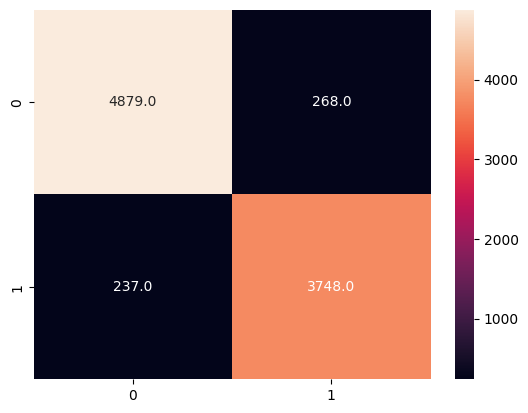

In [53]:
#confusion matrix of logistic regression with hyper-parameter tuning
confuse_mat_lr_hyper = confusion_matrix(y_test,y_pred_hyper_logclass)

#plotting confusion matrix
sns.heatmap(confuse_mat_lr_hyper, annot=True, fmt = ".1f")

After hyper-parameter tuning we get 93% accuracy.But if we analyze above graph,number of miss classification is decreased.

- Decision Tree Classifier

In [54]:
#Intialize decision tree model
decision_tree_class = DecisionTreeClassifier()

#fit training data
decision_tree_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
#predict the result
y_pred_decision_tree = decision_tree_class.predict(x_test)

In [56]:
#training and testing score
print(decision_tree_class.score(x_train,y_train))
print(decision_tree_class.score(x_test,y_test))

0.9673298047088885
0.9280551905387647


In [57]:
##report of decision tree classifier
report_dt = classification_report(y_test, y_pred_decision_tree)
print(report_dt)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5147
           1       0.92      0.91      0.92      3985

    accuracy                           0.93      9132
   macro avg       0.93      0.93      0.93      9132
weighted avg       0.93      0.93      0.93      9132



<Axes: >

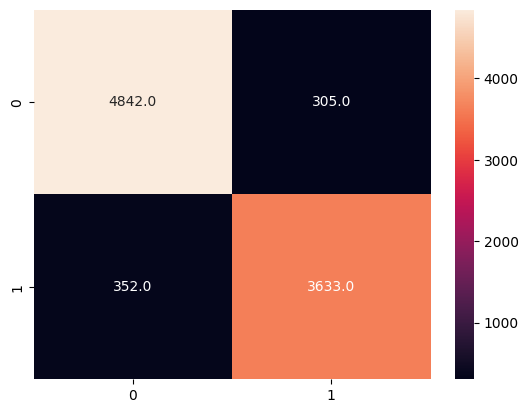

In [58]:
#confusion matrix for decision tree classifier
con_mat_decision_tree = confusion_matrix(y_test,y_pred_decision_tree)

#plotting the confusion matrix
sns.heatmap(con_mat_decision_tree,annot=True,fmt='.1f')

As we can see, accuracy score is 92%. And also difference between training and testing score is more,so overfitting is occur.

Apply hyper-parameter tuning , to overcome overfitting problem.

- Decision Tree With Hyper-Parameter tuning

In [59]:
#preprunning
params = {
    'criterion':['gini','entropy','logloss'],
    'splitter' : ['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    "min_samples_split":[5,7]
    # "min_samples_leaf":[2,3]
}

In [60]:
#hyper-parametr tuning
clf_decision_tree = GridSearchCV(decision_tree_class,params,cv=cv,n_jobs=-1,scoring='accuracy')

In [101]:
#fit train data
clf_decision_tree.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
#predict result
y_pred_decision_tree_hyper = clf_decision_tree.predict(x_test)

In [63]:
#best parameters of hyper-parameter tuning
print(clf_decision_tree.best_params_)
print(clf_decision_tree.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
0.9395875159700676


In [64]:
#accuracy score of train and test data
print(clf_decision_tree.score(x_train,y_train))
print(clf_decision_tree.score(x_test,y_test))

0.9435663442233985
0.9338589575120455


In [65]:
#report of decision tree classifier with hyper-parameter tuning
report_dt_hyper = classification_report(y_test,y_pred_decision_tree_hyper)
print(report_dt_hyper)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5147
           1       0.92      0.93      0.92      3985

    accuracy                           0.93      9132
   macro avg       0.93      0.93      0.93      9132
weighted avg       0.93      0.93      0.93      9132



<Axes: >

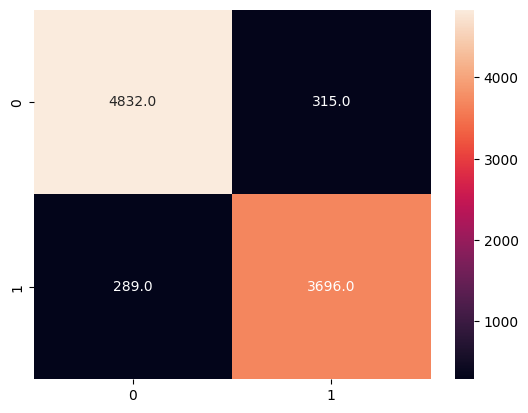

In [102]:
#confusion matrix
con_mat_dt_hyper = confusion_matrix(y_test,y_pred_decision_tree_hyper)

#plot confusion matrix
sns.heatmap(con_mat_dt_hyper,annot=True,fmt=".1f")

- Random Forest Classifier

In [67]:
#Intailize random forest model
random_forest_classifier = RandomForestClassifier()
#fit train data
random_forest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
#predict result
y_pred_rf = random_forest_classifier.predict(x_test)

In [69]:
#get train and test score
print(random_forest_classifier.score(x_train,y_train))
print(random_forest_classifier.score(x_test,y_test))

0.9673298047088885
0.9357205431449847


In [70]:
#report of random forest classifier
report_rf_classifier = classification_report(y_test,y_pred_rf)
print(report_rf_classifier)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5147
           1       0.93      0.93      0.93      3985

    accuracy                           0.94      9132
   macro avg       0.93      0.93      0.93      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

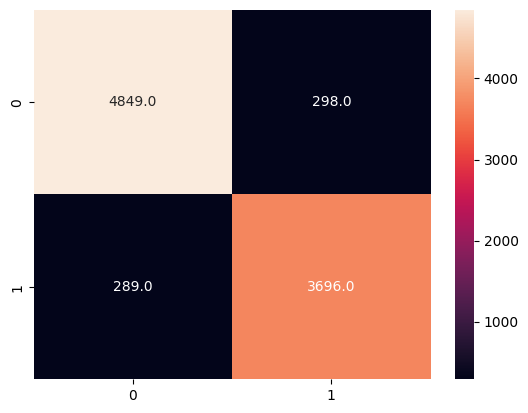

In [71]:
#confusion matrix 
con_mat_rf = confusion_matrix(y_test,y_pred_rf)

#plot confusion matrix
sns.heatmap(con_mat_rf,annot=True,fmt=".1f")

93% accuracy with Random Forest, but we can see some difference between train and test score,some overfitting scienario is there . Now we need to reduce these difference with help of hyper-parameter tuning

- Random Forest With Hyper-Parameter Tuning

In [72]:
#prepruning
params_rf = {
    'criterion':['gini','entropy','logloss'],
    'max_depth': [2,3,5,7,10],
    'min_samples_leaf': [5,7,10],
    "min_samples_leaf":[2,3],
    'n_estimators': [10,25,30]
}

In [73]:
#hyper-parameter tuning
clf_rf = GridSearchCV(random_forest_classifier,params_rf,cv=cv,n_jobs=-1,scoring='accuracy')

In [103]:
# fit train data
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [75]:
#predict result
y_pred_rf_hyper=clf_rf.predict(x_test)

In [76]:
#train and test score
print(clf_rf.score(x_train,y_train))
print(clf_rf.score(x_test,y_test))

0.9480562146377076
0.945904511607534


In [77]:
#best parameters after hyper-parameter tuning
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 30}
0.9445519255338566


In [78]:
#report of random forest classifier
report_rf_classifier_hyper = classification_report(y_test,y_pred_rf_hyper)
print(report_rf_classifier_hyper)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5147
           1       0.94      0.93      0.94      3985

    accuracy                           0.95      9132
   macro avg       0.95      0.94      0.94      9132
weighted avg       0.95      0.95      0.95      9132



<Axes: >

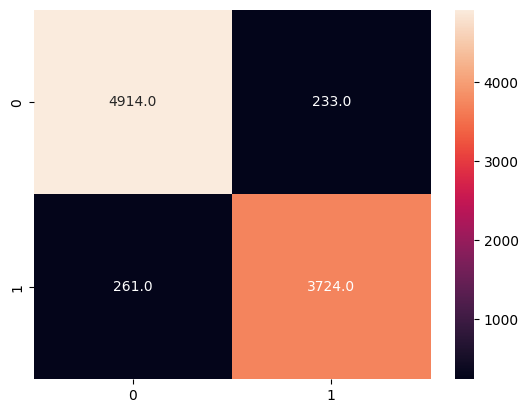

In [79]:
#confusion matrix
con_mat_rf_hyper = confusion_matrix(y_test,y_pred_rf_hyper)

#plot confusion matrix
sns.heatmap(con_mat_rf_hyper,annot=True,fmt='.1f')

As we can see that overfitting is reduced,our train and test score are close as compared to without hyper-parameter tuning in random forest,
and we get 93% accuracy.

Best accuracy is 94%.

Classification error is also reduced ,as we can see above graph.

- K-Nearest Neighbour Classifier

In [80]:
#define knn mode
knn_classifier = KNeighborsClassifier()
#fit train data
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
#predict result
y_pred_knn = knn_classifier.predict(x_test)

In [82]:
#train and test score
print(knn_classifier.score(x_train,y_train))
print(knn_classifier.score(x_test,y_test))

0.9528381091440044
0.9407577748576434


In [83]:
#report of knn
report_knn_classifier = classification_report(y_test,y_pred_knn)
print(report_knn_classifier)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5147
           1       0.93      0.94      0.93      3985

    accuracy                           0.94      9132
   macro avg       0.94      0.94      0.94      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

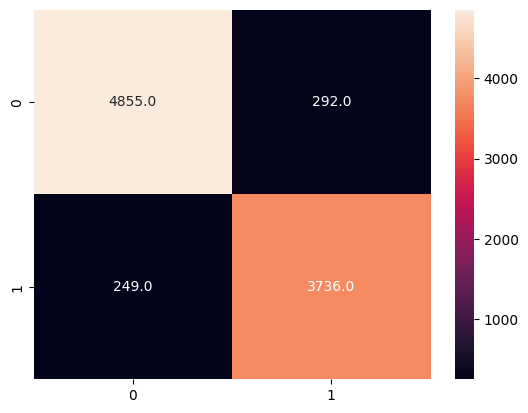

In [84]:
#confusion matrix
con_mat_knn  = confusion_matrix(y_test,y_pred_knn)

#plot confusion matrix
sns.heatmap(con_mat_knn,annot=True,fmt=".1f")

93% accuracy with KNN classifier.Here train and test score is also close.

- Support Vector Machine

In [85]:
#define model
support_vector = LinearSVC()

#fit train data
support_vector.fit(x_train,y_train)

LinearSVC()

In [86]:
#predict the result
y_pred_svm = support_vector.predict(x_test)

In [87]:
#train and test score
print(support_vector.score(x_train,y_train))
print(support_vector.score(x_test,y_test))

0.9443329074648659
0.9446999561979851


In [88]:
#report of svm 
report_svm= classification_report(y_test,y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5147
           1       0.93      0.94      0.94      3985

    accuracy                           0.94      9132
   macro avg       0.94      0.94      0.94      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

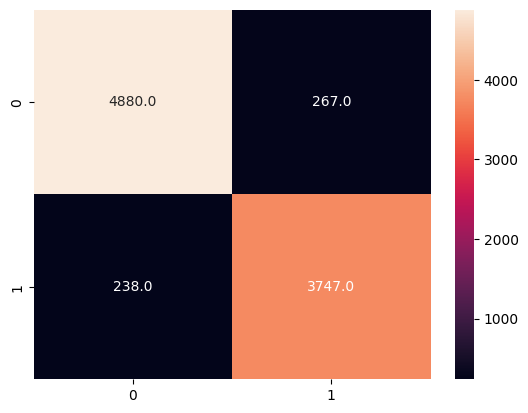

In [89]:
#confusion matrix
con_mat_svm = confusion_matrix(y_test,y_pred_svm)

#plot confusion matrix
sns.heatmap(con_mat_svm,annot=True,fmt=".1f")

We get 93% accuracy with support vector machine classifier,no overfitting is found.


- Naive Bayes Classifier

In [90]:
#define naive bayes model
naive_bayes = GaussianNB()

#fit train data
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [91]:
#predict the result
y_pred_naive = naive_bayes.predict(x_test)

In [92]:
#train and test score
print(naive_bayes.score(x_train,y_train))
print(naive_bayes.score(x_test,y_test))

0.9440773863843767
0.9444809461235217


In [93]:
#report of naive bayes
report_naive= classification_report(y_test,y_pred_naive)
print(report_naive)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5147
           1       0.94      0.94      0.94      3985

    accuracy                           0.94      9132
   macro avg       0.94      0.94      0.94      9132
weighted avg       0.94      0.94      0.94      9132



<Axes: >

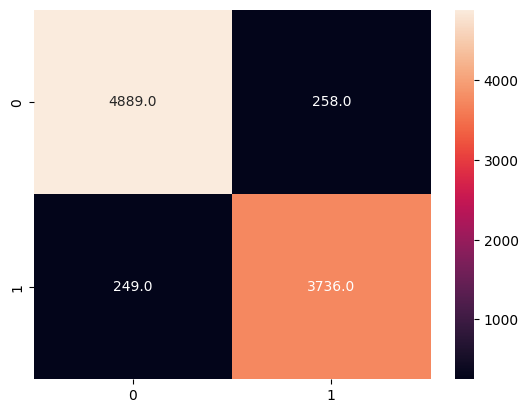

In [94]:
#confusion matrix
con_mat_naive = confusion_matrix(y_test,y_pred_naive)

#plot confusion matrix
sns.heatmap(con_mat_naive,annot=True,fmt=".1f")

We get 91% acccuracy with Naive Bayes Classifier.

### **Accuracy Metrics for All Fitted Model**

In [95]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics


In [96]:
models=[log_class,clf_decision_tree,clf_rf,knn_classifier,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector machine','Naive Bayes Classifier']

In [97]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.944333    0.944700
1  Precsion_Score     0.938791    0.933267
2    Recall_Score     0.933539    0.940527
3   Roc_Auc_Score     0.943128    0.944229

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.943566    0.933859
1  Precsion_Score     0.937139    0.921466
2    Recall_Score     0.933539    0.927478
3   Roc_Auc_Score     0.942447    0.933139

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.948056    0.945905
1  Precsion_Score     0.948191    0.941117
2    Recall_Score     0.932120    0.934504
3   Roc_Auc_Score     0.946278    0.944618

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.952838  

In [98]:
import pickle

# Define the filename
filename = 'model.pkl'

# Save the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(clf_rf, file)

print(f"Model saved to {filename}")

Model saved to model.pkl


### **Conclusion**

- Solo Lesisure has the highest value counts, we can  conclude that most people who travel by airline travel is solo.37.22% people who travel by airline is solo. Followed by couple and family.

- We can conclude that most of the people around 78.44% people choose economy class to travel by airline. Followed by Business class and others.

- 50% passenger are giving 4.0 and 5.0 rating for cabin-service when overall rating of airline is good. So we can say good cabin-service positively impacts airline businesses.

- 30% people are not satisfied with entertainment service. As they give 1.0 rating.

- 38% people are giving 4.0 and 5.0 rating for seat comfort. So overall rating is bad. So we can say that bad value for entertainment service negatively impact airline business.

- 42% passengers gave an overall rating below 3.0 . So it, suggests that people are not very much satisfied with airline services. There are still need of improvements

- We performed Hyperparameter tuning using Grid search CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbour ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done.

- We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.We can conclude that Logistic Regression gives the best model.

-  Model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

- The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

- In order to increase their business or grow, our client must provide excellent cabin service, ground service, food-beverage entertainment, and seat comfort.
